In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def simulate_geometric_brownian_motion(num_steps, mean_return, volatility):
    """
    Simulate a geometric Brownian motion.

    Parameters:
    - num_steps (int): Number of time steps in the simulation.
    - mean_return (float): Mean return rate of the geometric Brownian motion.
    - volatility (float): Volatility or drift of the geometric Brownian motion.

    Returns:
    - np.ndarray: Array representing the simulated values of the geometric Brownian motion.
    """
    # Generate random samples from a normal distribution
    random_samples = np.random.normal(mean_return, 1, num_steps)

    # Calculate the cumulative sum of the random samples
    cumulative_sum = np.cumsum(random_samples)

    # Apply the geometric Brownian motion formula
    simulated_values = np.exp(volatility * cumulative_sum)

    return simulated_values

In [46]:
def simulate_and_plot_stochastic_process(num_steps, mean_return, volatility, num_simulations):
    """
    Simulate and visualize a stochastic process using Monte Carlo simulation.

    Parameters:
    - num_steps (int): Number of time steps in each simulation.
    - mean_return (float): Mean return rate of the stochastic process.
    - volatility (float): Volatility or drift of the stochastic process.
    - num_simulations (int): Number of Monte Carlo simulations to perform.

    Returns:
    None (displays a plot).
    """
    # Monte Carlo simulation to generate multiple trajectories
    simulations = []
    for _ in range(num_simulations):
        trajectory = simulate_geometric_brownian_motion(num_steps, mean_return, volatility)
        simulations.append(trajectory)
    
    simulations = np.array(simulations)

    # Calculate mean and standard deviation across simulations
    mean_trajectory = np.mean(simulations, axis=0)
    std_trajectory = np.std(simulations, axis=0)

    # Plot individual trajectories, mean, and standard deviation
    plt.figure(figsize=(14, 5))
    for i in range(min(10, num_simulations)):
        plt.plot(range(num_steps), simulations[i], linewidth=1.5)

    # Plot mean and standard deviation functions
    plt.plot(range(num_steps), mean_trajectory, color="black", linewidth=2, label="Estimated Mean Function")
    plt.plot(range(num_steps), std_trajectory, color="blue", linewidth=2, label="Estimated Std Deviation Function")

    # Additional plot details
    plt.grid()
    plt.xlabel("Steps")
    plt.ylabel("Position")
    plt.title(f"Stochastic Process - Trajectories and Monte Carlo Estimated Functions ($Volatility = {volatility}$)")
    plt.legend()
    plt.show()

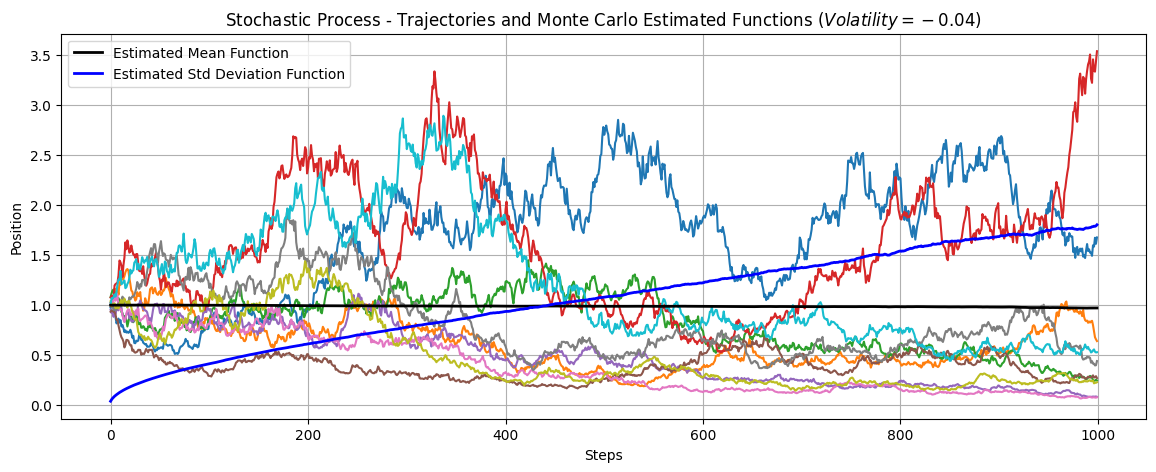

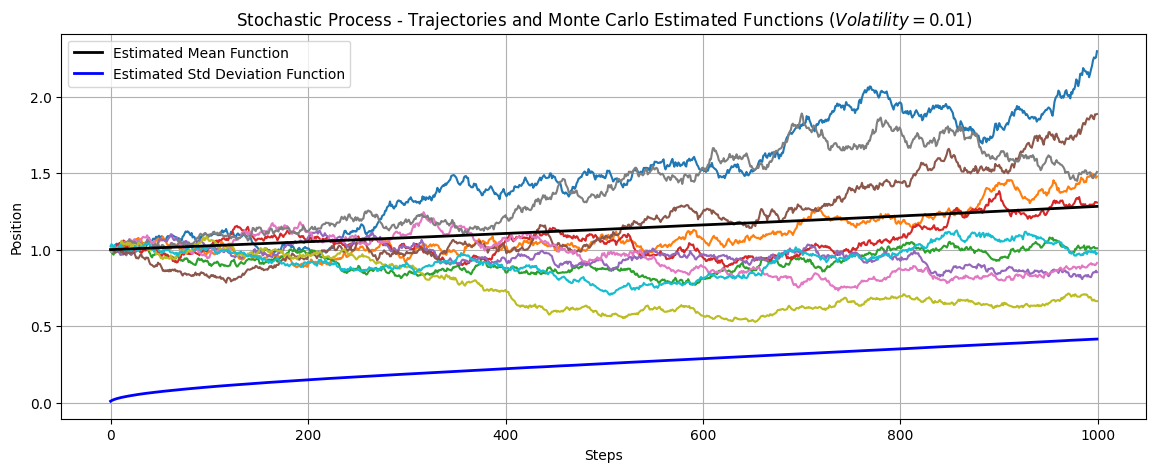

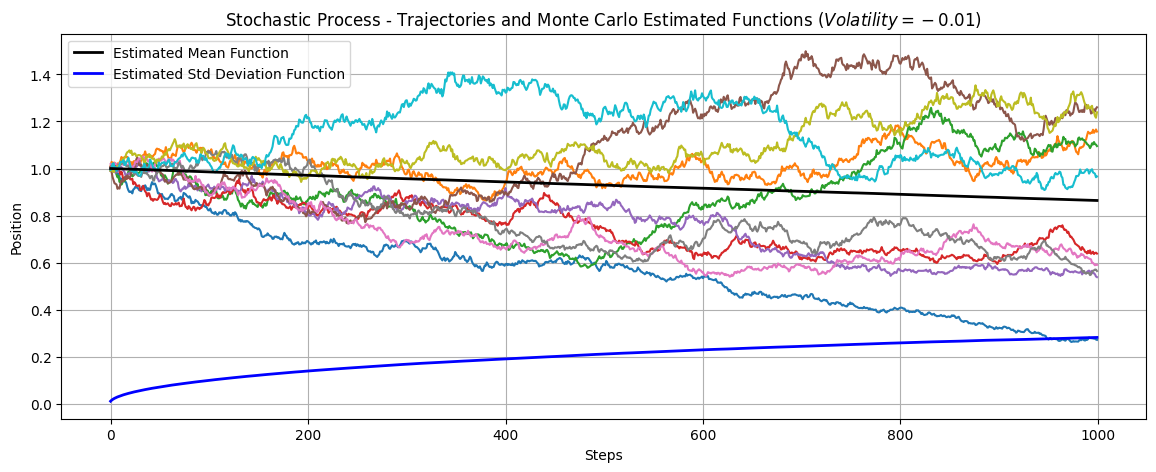

In [48]:
# Example parameters
num_steps = 1_000
mean_return_example = 0.02
volatility = {"Martingale": -0.04, "Submartingale": 0.01, "Supermartingale": -0.01}
num_simulations = 50_000

for process_type, process_volatility in volatility.items():
    simulate_and_plot_stochastic_process(num_steps, mean_return_example, process_volatility, num_simulations)

The mean function shows consistent monotonic trends for each type, aligning with Task 7. In the martingale, the function remains constant, while in submartingales or supermartingales, the standard deviation increases over time.